In [ ]:
#initial import of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo - Data Science/Belt Exam/ds_salaries.csv',index_col=[0])



In [ ]:
display(df.info(),
        df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Also importing coco to convert country names

!pip install country_converter --upgrade
import country_converter as coco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#fixing naming convention and also dropping unnecesary columns


df = df.replace({'employment_type':
                 {'FT':'Full Time',
                  'PT':'Part-Time',
                  'CT':'Contract',
                  'FL':'Freelance'},
                 'experience_level':
                 {'EN':'Entry Level',
                  'MI':'Mid Level',
                  'SE':'Senior Level',
                  'EX':'Executive'},
                 'company_size':
                 {'L':'Large',
                  'M':'Medium',
                  'S':'Small'},
                 'remote_ratio':
                 {0:'Onsite',
                  50:'Hybrid',
                  100:'Remote'}})

df['company_location'] = coco.convert(names=df['company_location'],
                                      to='name_short')
df['employee_residence'] = coco.convert(names=df['employee_residence'],
                                        to='name_short')
df = df.drop(columns=['salary','salary_currency']); #dropped local currency salary since we'll be focusing more on the value in USD.


In [ ]:
#creating a function to check for employee residence and company location

def offshore(row):
  if row['employee_residence'] == row['company_location']:
    val = 'Same Country'
  else:
    val = 'Offshore'
  return val

df['work_location'] = df.apply(offshore,axis=1)

df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_location
0,2020,Mid Level,Full Time,Data Scientist,79833,Germany,Onsite,Germany,Large,Same Country
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,Japan,Onsite,Japan,Small,Same Country
2,2020,Senior Level,Full Time,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium,Same Country
3,2020,Mid Level,Full Time,Product Data Analyst,20000,Honduras,Onsite,Honduras,Small,Same Country
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,United States,Hybrid,United States,Large,Same Country
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full Time,Data Engineer,154000,United States,Remote,United States,Medium,Same Country
603,2022,Senior Level,Full Time,Data Engineer,126000,United States,Remote,United States,Medium,Same Country
604,2022,Senior Level,Full Time,Data Analyst,129000,United States,Onsite,United States,Medium,Same Country
605,2022,Senior Level,Full Time,Data Analyst,150000,United States,Remote,United States,Medium,Same Country


In [ ]:
display(df.isnull().sum(),
        df.duplicated().value_counts())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
work_location         0
dtype: int64

False    565
True      42
dtype: int64

In [ ]:
#dropping duplicates

df = df.drop_duplicates()

In [ ]:
df['work_year'] = pd.to_datetime(df['work_year'],format='%Y')
df['work_year'] = df['work_year'].dt.strftime('%Y')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_location
0,2020,Mid Level,Full Time,Data Scientist,79833,Germany,Onsite,Germany,Large,Same Country
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,Japan,Onsite,Japan,Small,Same Country
2,2020,Senior Level,Full Time,Big Data Engineer,109024,United Kingdom,Hybrid,United Kingdom,Medium,Same Country
3,2020,Mid Level,Full Time,Product Data Analyst,20000,Honduras,Onsite,Honduras,Small,Same Country
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,United States,Hybrid,United States,Large,Same Country
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full Time,Data Engineer,154000,United States,Remote,United States,Medium,Same Country
603,2022,Senior Level,Full Time,Data Engineer,126000,United States,Remote,United States,Medium,Same Country
604,2022,Senior Level,Full Time,Data Analyst,129000,United States,Onsite,United States,Medium,Same Country
605,2022,Senior Level,Full Time,Data Analyst,150000,United States,Remote,United States,Medium,Same Country


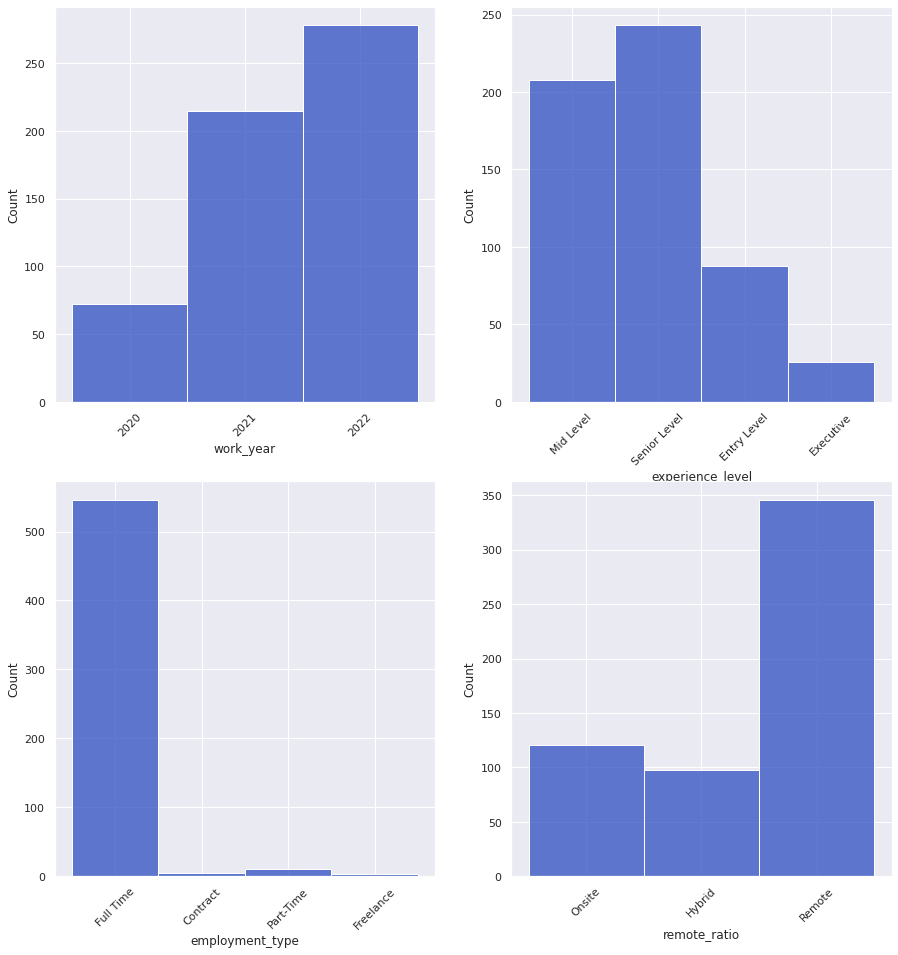

In [ ]:
categorical = list(enumerate(['work_year','experience_level','employment_type','remote_ratio']))
sns.set_theme(style='darkgrid',palette=['#2e4ec0','#1a3fae','#12398a','#07344f','#02122a'])
plt.figure(figsize=(15,16))
plt.tight_layout()

for c in categorical:
  plt.subplot(2,2,c[0]+1)
  sns.histplot(x=c[1],
              data=df)
  plt.xticks(rotation=45)

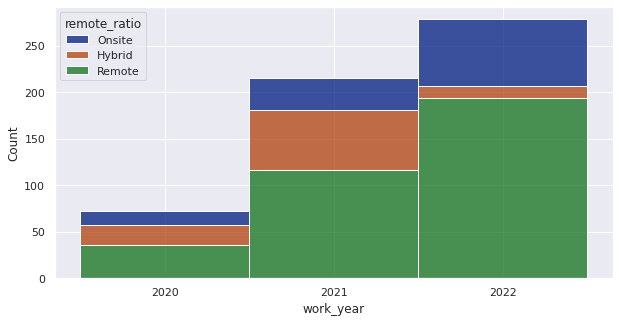

In [ ]:
sns.set_theme(style='darkgrid',palette='dark')
plt.figure(figsize=(10,5))

sns.histplot(x='work_year',
             hue='remote_ratio',
             data=df,
             multiple="stack");
#We can immediately see that more jobs in the data scientist jobs are getting filled.
#On these jobs, most of the jobs are remote.
#Since the world is almost getting back to normal, we can observe that there are more jobs onsite for 2022 as compare to hybrid from 2021.

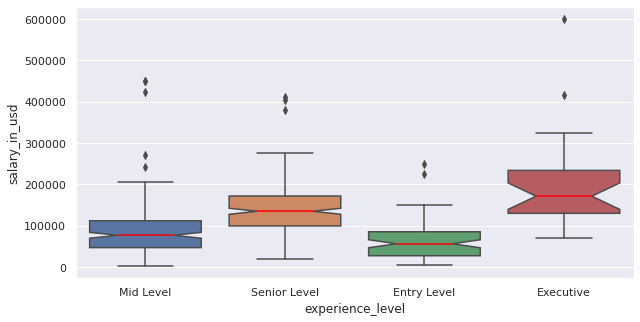

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style='darkgrid')


sns.boxplot(x='experience_level',
            y='salary_in_usd',
            data=df,
            notch=True,
            medianprops={'color':'red'});

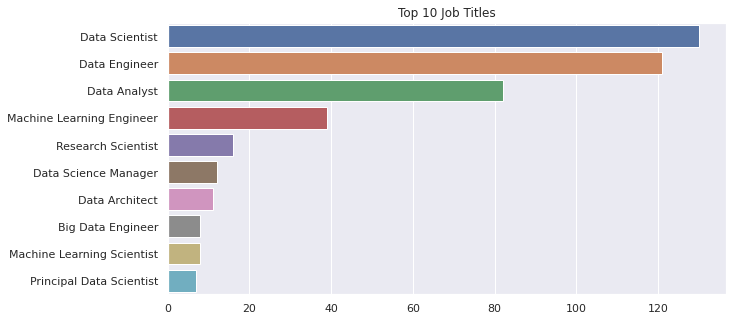

In [ ]:
top10 = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.title(label='Top 10 Job Titles')

sns.barplot(y=top10.index,
            x=top10.values);

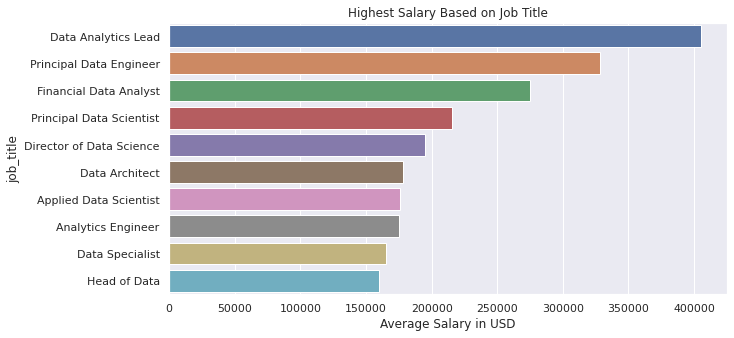

In [ ]:
highest_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.title(label='Highest Salary Based on Job Title')
plt.xlabel(xlabel='Average Salary in USD')


sns.barplot(x=highest_salary.values,
            y=highest_salary.index);

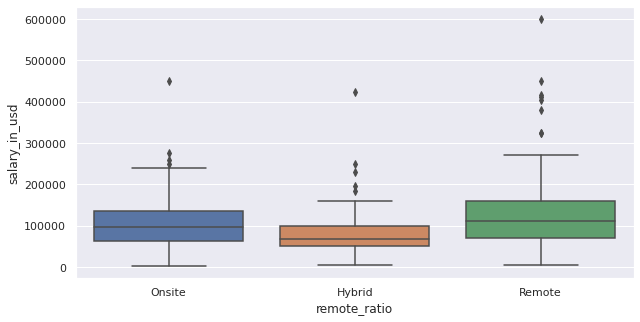

In [ ]:
#Also want to check whether working remotely affects the salary
plt.figure(figsize=(10,5))

sns.boxplot(x='remote_ratio',
            y='salary_in_usd',
            data=df);

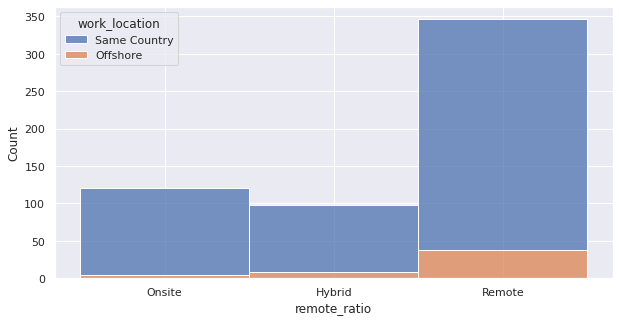

In [ ]:
plt.figure(figsize=(10,5))


sns.histplot(x='remote_ratio',
             hue='work_location',
             data=df,
             multiple='stack');